# 1. 동영상 데이터 처리 기본
- OpenCV를 이용해 비디오 파일 읽을 수 있음
- 비디오는 이미지(프레임) 모음
- get함수 이용하여 속성 정보 불러올 수 있음
- 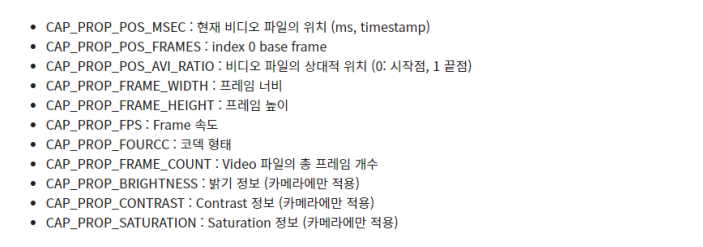

# 2. 동영상 데이터 처리 실습
- 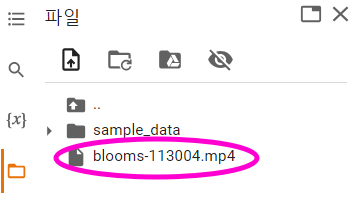

>## 1) 동영상 파일 읽기

In [4]:
!pip install openCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement openCV (from versions: none)
ERROR: No matching distribution found for openCV


In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [ ]:
# 비디오 파일 읽기
cap = cv2.VideoCapture("blooms-113004.mp4")

# 비디오 정보 가져오기s
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# 비디오 정보 보기
print(f"Original width and height: {width}x{height}")
print(f"fpt: {fps}")  #FPS : 초당 프레임수
print(f"frame count: {frame_count}")

#동영상 파일 읽기
if cap.isOpened():  #캡처 객체 초기화 확인
  while True:
    ret, frame = cap.read() #다음 프레임 읽기
    if ret:   #프레임 읽기 정상

      # 영상 크기 수정을 위한 프레임 크기 조정
      frame = cv2.resize(frame, (640,480))

      # 화면표시
      cv2.imshow('Video', frame)

      # q 누르면 종료
      if cv2.watiKey(25)&0xFF == ord('q'):  #25ms지연(40fps가정)
        exit()
      else:
        break
else:
  print("can't open video") #캡처 객체 초기화 실패

cap.release()   #캡처 지원 반납
cv2.destroyAllWindows()

>## 2) 동영상 파일 프레임 나눠서 저장하기 예시
- 25FPS 기준으로 프레임 나눠서 저장

In [ ]:
import cv2
import os

#비디오 파일 읽기 
cap = cv2.VideoCapture("blooms-113004.mp4")

#FPS 지정
fps = 25

#동영상 파일 읽기 예시
count = 0
if cap.isOpened():  #캡쳐 객체 초기화 확인
  while True:
    ret, frame = cap.read() #다음 프레임 읽기

    if ret: #프레임 읽기 정상
      if(int(cap.get(1)) % fps == 0):
        os.makedirs("frame_image_save",
                    exist_of=True)  #이미지 저장할 폴더 생성
        cv2.imwrite(
            f"frame_image_save/image_{str(count).zfill(4)}.png", frame)
        count = count+1
    else:
      break
else:
  print("can't open video.")  #캡쳐 객체 초기화 실패 
  
cap.release() #캡쳐 지원 반납
cv2.destroyAllWindows()        )